<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Basic Time Series Plotting</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://matplotlib.org/_images/date_demo.png" alt="METAR" style="height: 300px;"></div>


## Overview:

* **Teaching:** 45 minutes
* **Exercises:** 30 minutes

### Questions
1. How can we obtain buoy data from the NDBC?
1. How are plots created in Python?
1. What features does Matplotlib have for improving our time series plots?
1. How can multiple y-axes be used in a single plot?

### Objectives
1. <a href="#loaddata">Obtaining data</a>
1. <a href="#basictimeseries">Basic timeseries plotting</a>
1. <a href="#multiy">Multiple y-axes</a>

<a name="loaddata"></a>
## Obtaining Data
To learn about time series analysis, we first need to find some data and get it into Python. In this case we're going to use data from the [National Data Buoy Center](http://www.ndbc.noaa.gov). We'll use the [pandas](http://pandas.pydata.org) library for our data subset and manipulation operations after obtaining the data with siphon. 

Each buoy has many types of data availabe, you can read all about it in the [NDBC Web Data Guide](https://www.ndbc.noaa.gov/docs/ndbc_web_data_guide.pdf). There is a mechanism in siphon to see which data types are available for a given buoy.

In [1]:
from siphon.simplewebservice.ndbc import NDBC

data_types = NDBC.buoy_data_types('46042')
print(data_types)

{'txt': 'standard meteorological data', 'spec': 'spectral wave summaries', 'data_spec': 'raw spectral wave data', 'swdir': 'spectral wave data (alpha1)', 'swdir2': 'spectral wave data (alpha2)', 'swr1': 'spectral wave data (r1)', 'swr2': 'spectral wave data (r2)', 'supl': 'supplemental measurements data'}


In this case, we'll just stick with the standard meteorological data. The "realtime" data from NDBC contains approximately 45 days of data from each buoy. We'll retreive that record for buoy 51002 and then do some cleaning of the data. 

In [2]:
df = NDBC.realtime_observations('46042')

In [3]:
df.tail()

,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,air_temperature,water_temperature,dewpoint,visibility,3hr_pressure_tendency,water_level_above_mean,time
6496,320.0,5.0,7.0,3.2,NaN,9.4,312.0,1018.7,13.5,14.0,12.1,NaN,NaN,NaN,2019-11-25 00:40:00+00:00
6497,320.0,5.0,7.0,NaN,NaN,NaN,NaN,1018.9,13.5,14.0,12.2,NaN,NaN,NaN,2019-11-25 00:30:00+00:00
6498,320.0,5.0,7.0,NaN,NaN,NaN,NaN,1019.0,13.5,14.0,12.2,NaN,NaN,NaN,2019-11-25 00:20:00+00:00
6499,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1018.9,13.5,14.0,12.1,NaN,NaN,NaN,2019-11-25 00:10:00+00:00
6500,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1019.0,13.6,NaN,12.1,NaN,NaN,NaN,2019-11-25 00:00:00+00:00


Let's get rid of the columns with all missing data. We could use the `drop` method and manually name all of the columns, but that would require us to know which are all `NaN` and that sounds like manual labor - something that programmers hate. Pandas has the `dropna` method that allows us to drop rows or columns where any or all values are `NaN`. In this case, let's drop all columns with all `NaN` values.

In [4]:
df = df.dropna(axis='columns', how='all')

In [5]:
df.head()

,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,air_temperature,water_temperature,dewpoint,3hr_pressure_tendency,time
0,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1020.5,12.2,13.0,7.8,NaN,2020-01-09 06:10:00+00:00
1,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1020.4,12.2,NaN,7.7,NaN,2020-01-09 06:00:00+00:00
2,320.0,6.0,8.0,2.7,12.0,8.4,285.0,1020.4,12.2,13.0,7.8,NaN,2020-01-09 05:50:00+00:00
3,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1020.5,12.2,13.0,7.7,NaN,2020-01-09 05:40:00+00:00
4,320.0,7.0,8.0,NaN,NaN,NaN,NaN,1020.4,12.2,13.0,7.6,NaN,2020-01-09 05:30:00+00:00


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Use the realtime_observations method to retreive supplemental data for buoy 41002. **Note** assign the data to something other that df or you'll have to rerun the data download cell above. We suggest using the name supl_obs.</li>
    </ul>
</div>

In [6]:
# Your code goes here
# supl_obs =

#### Solution

In [7]:
# %load solutions/get_obs.py

# Cell content replaced by load magic replacement.
supl_obs = NDBC.realtime_observations('41002', data_type='supl')
supl_obs.tail()


,hourly_low_pressure,hourly_low_pressure_time,hourly_high_wind,hourly_high_wind_direction,hourly_high_wind_time,time
6493,NaN,NaT,9,NaN,2019-11-25 00:35:00+00:00,2019-11-25 00:40:00+00:00
6494,NaN,NaT,9,NaN,2019-11-25 00:21:00+00:00,2019-11-25 00:30:00+00:00
6495,NaN,NaT,9,NaN,2019-11-25 00:11:00+00:00,2019-11-25 00:20:00+00:00
6496,NaN,NaT,10,NaN,2019-11-25 00:05:00+00:00,2019-11-25 00:10:00+00:00
6497,NaN,NaT,10,NaN,2019-11-25 23:54:00+00:00,2019-11-25 00:00:00+00:00


Finally, we need to trim down the data. The file contains 45 days worth of observations. Let's look at the last week's worth of data.

In [8]:
import pandas as pd
idx = df.time >= (pd.Timestamp.utcnow() - pd.Timedelta(days=7))
df = df[idx]
df.head()

,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,air_temperature,water_temperature,dewpoint,3hr_pressure_tendency,time
0,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1020.5,12.2,13.0,7.8,NaN,2020-01-09 06:10:00+00:00
1,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1020.4,12.2,NaN,7.7,NaN,2020-01-09 06:00:00+00:00
2,320.0,6.0,8.0,2.7,12.0,8.4,285.0,1020.4,12.2,13.0,7.8,NaN,2020-01-09 05:50:00+00:00
3,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1020.5,12.2,13.0,7.7,NaN,2020-01-09 05:40:00+00:00
4,320.0,7.0,8.0,NaN,NaN,NaN,NaN,1020.4,12.2,13.0,7.6,NaN,2020-01-09 05:30:00+00:00


We're almost ready, but now the index column is not that meaningful. It starts at a non-zero row, which is fine with our initial file, but let's re-zero the index so we have a nice clean data frame to start with.

In [9]:
df.reset_index(drop=True, inplace=True)
df.head()

,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,air_temperature,water_temperature,dewpoint,3hr_pressure_tendency,time
0,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1020.5,12.2,13.0,7.8,NaN,2020-01-09 06:10:00+00:00
1,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1020.4,12.2,NaN,7.7,NaN,2020-01-09 06:00:00+00:00
2,320.0,6.0,8.0,2.7,12.0,8.4,285.0,1020.4,12.2,13.0,7.8,NaN,2020-01-09 05:50:00+00:00
3,320.0,6.0,8.0,NaN,NaN,NaN,NaN,1020.5,12.2,13.0,7.7,NaN,2020-01-09 05:40:00+00:00
4,320.0,7.0,8.0,NaN,NaN,NaN,NaN,1020.4,12.2,13.0,7.6,NaN,2020-01-09 05:30:00+00:00


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="basictimeseries"></a>
## Basic Timeseries Plotting

Matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. We're going to learn the basics of creating timeseries plots with matplotlib by plotting buoy wind, gust, temperature, and pressure data.

In [10]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

We'll start by plotting the windspeed observations from the buoy.

/home/travis/miniconda/envs/training/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


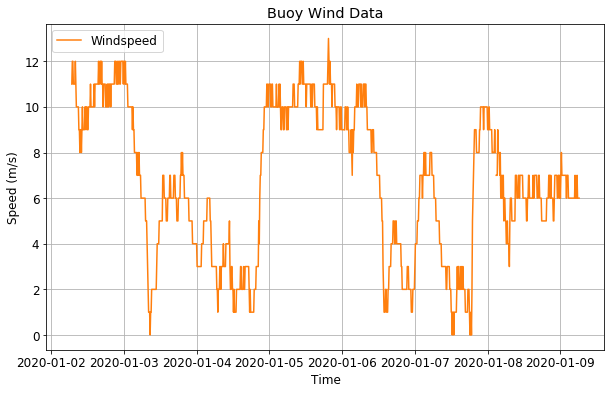

In [11]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.time, df.wind_speed, color='tab:orange', label='Windspeed')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Speed (m/s)')
ax.set_title('Buoy Wind Data')
ax.grid(True)
ax.legend(loc='upper left');

Our x axis labels look a little crowded - let's try only labeling each day in our time series.

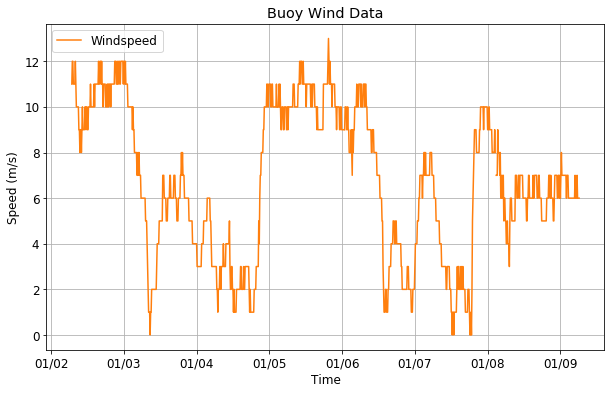

In [12]:
# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

fig

Now we can add wind gust speeds to the same plot as a dashed yellow line.

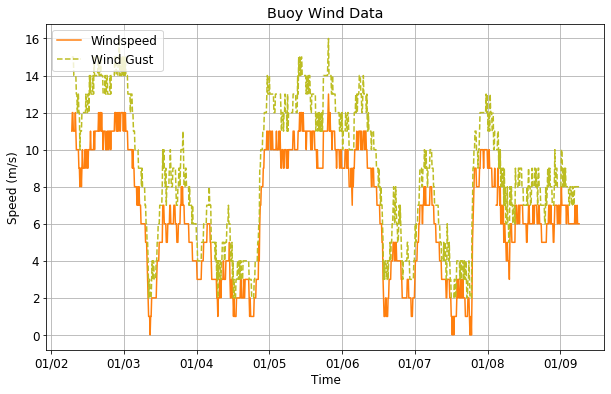

In [13]:
# Use linestyle keyword to style our plot
ax.plot(df.time, df.wind_gust, color='tab:olive', linestyle='--',
        label='Wind Gust')
# Redisplay the legend to show our new wind gust line
ax.legend(loc='upper left')

fig

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
    <li>Create your own figure and axes (<code>myfig, myax = plt.subplots(figsize=(10, 6))</code>) which plots temperature.</li>
    <li>Change the x-axis major tick labels to display the shortened month and date (i.e. 'Sep DD' where DD is the day number). Look at the
        <a href="https://docs.python.org/3.6/library/datetime.html#strftime-and-strptime-behavior">
            table of formatters</a> for help.
    <li>Make sure you include a legend and labels!</li>
    <li><b>BONUS:</b> try changing the <code>linestyle</code>, e.g., a blue dashed line.</li>
    </ul>
</div>

In [14]:
# Your code goes here


#### Solution
<div class="alert alert-info">
    <b>Tip</b>:
     If your figure goes sideways as you try multiple things, try running the notebook up to this point again
     by using the Cell -> Run All Above option in the menu bar.
</div>

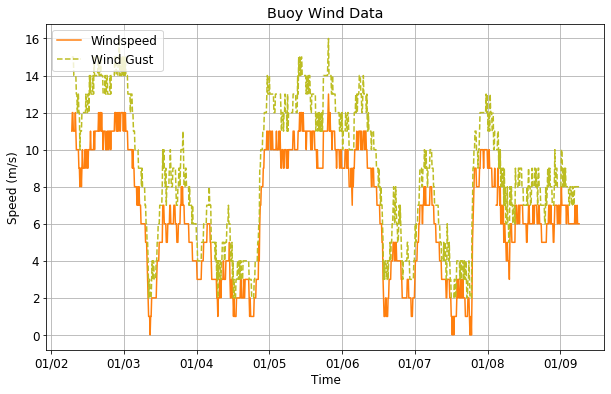

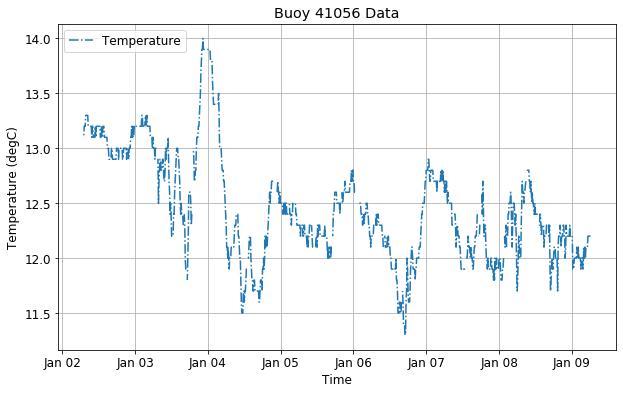

In [15]:
# %load solutions/basic_plot.py

# Cell content replaced by load magic replacement.
myfig, myax = plt.subplots(figsize=(10, 6))

# Plot temperature
myax.plot(df.time, df.air_temperature, color='tab:blue', linestyle='-.', label='Temperature')


myax.set_xlabel('Time')
myax.set_ylabel('Temperature (degC)')
myax.set_title('Buoy 41056 Data')
myax.grid(True)


# format x axis labels
myax.xaxis.set_major_locator(DayLocator())
myax.xaxis.set_major_formatter(DateFormatter('%b %d'))


myax.legend(loc='upper left');
fig


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="multiy"></a>
## Multiple y-axes
What if we wanted to plot another variable in vastly different units on our plot? <br/>
Let's return to our wind data plot and add pressure.

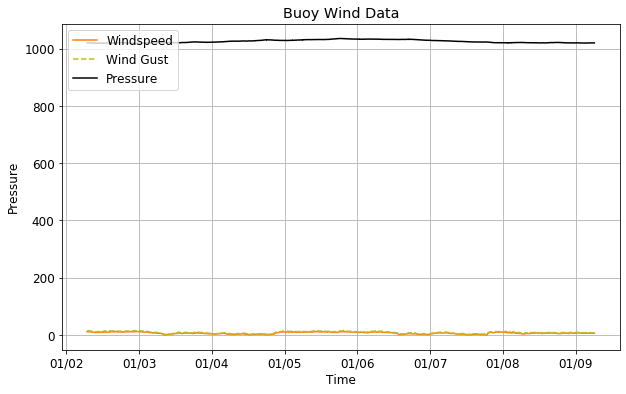

In [16]:
# plot pressure data on same figure
ax.plot(df.time, df.pressure, color='black', label='Pressure')
ax.set_ylabel('Pressure')

ax.legend(loc='upper left')

fig

That is less than ideal. We can't see detail in the data profiles! We can create a twin of the x-axis and have a secondary y-axis on the right side of the plot. We'll create a totally new figure here.

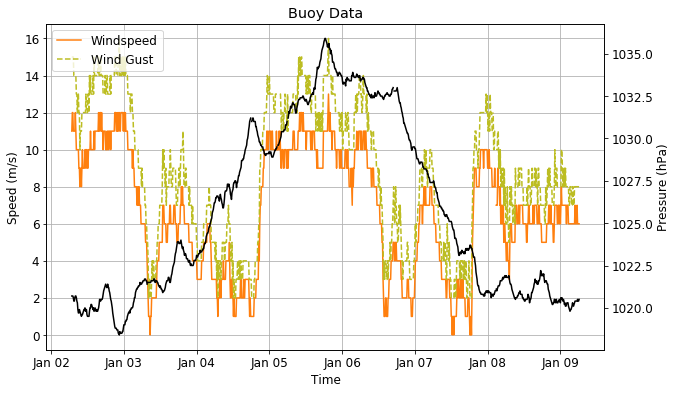

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Speed (m/s)')
ax.set_title('Buoy Data')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df.time, df.wind_speed, color='tab:orange', label='Windspeed')
ax.plot(df.time, df.wind_gust, color='tab:olive', linestyle='--', label='Wind Gust')
ax.legend(loc='upper left');

# Plotting on the second y-axis
axb.set_ylabel('Pressure (hPa)')
axb.plot(df.time, df.pressure, color='black', label='pressure')

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))


We're closer, but the data are plotting over the legend and not included in the legend. That's because the legend is associated with our primary y-axis. We need to append that data from the second y-axis.

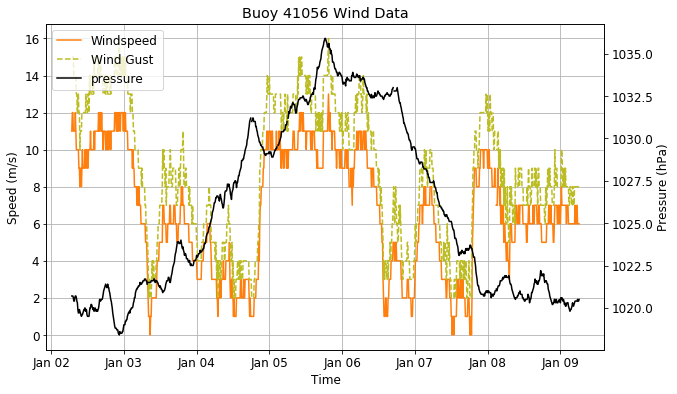

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Speed (m/s)')
ax.set_title('Buoy 41056 Wind Data')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df.time, df.wind_speed, color='tab:orange', label='Windspeed')
ax.plot(df.time, df.wind_gust, color='tab:olive', linestyle='--', label='Wind Gust')

# Plotting on the second y-axis
axb.set_ylabel('Pressure (hPa)')
axb.plot(df.time, df.pressure, color='black', label='pressure')

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

<div class="alert alert-success">
    <b>EXERCISE</b>:
    Create your own plot that has the following elements:
     <ul>
    <li>A blue line representing the wave height measurements.</li>
    <li>A green line representing wind speed on a secondary y-axis</li>
    <li>Proper labels/title.</li>
    <li>**Bonus**: Make the wave height data plot as points only with no line. Look at the documentation for the linestyle and marker arguments.</li>
    </ul>
</div>

In [19]:
# Your code goes here


#### Solution

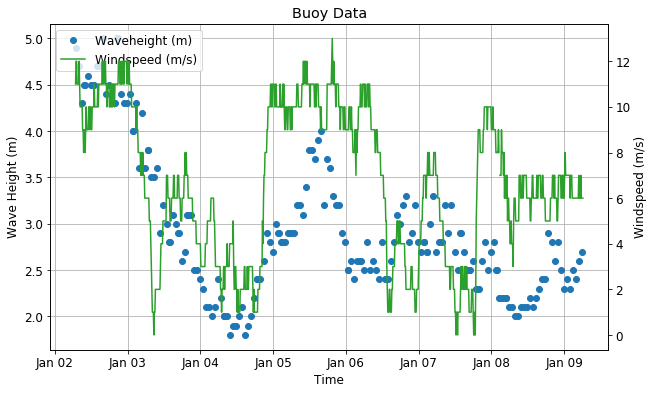

In [20]:
# %load solutions/adv_plot.py

# Cell content replaced by load magic replacement.
myfig, myax = plt.subplots(figsize=(10, 6))
myaxb = myax.twinx()

# Same as above
myax.set_xlabel('Time')
myax.set_ylabel('Wave Height (m)')
myax.set_title('Buoy Data')
myax.grid(True)

# Plotting on the first y-axis
myax.plot(df.time, df.wave_height, color='tab:blue', label='Waveheight (m)',
        linestyle='None', marker='o')

# Plotting on the second y-axis
myaxb.set_ylabel('Windspeed (m/s)')
myaxb.plot(df.time, df.wind_speed, color='tab:green', label='Windspeed (m/s)')

myax.xaxis.set_major_locator(DayLocator())
myax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# Handling of getting lines and labels from all axes for a single legend
mylines, mylabels = myax.get_legend_handles_labels()
mylines2, mylabels2 = myaxb.get_legend_handles_labels()
myax.legend(mylines + mylines2, mylabels + mylabels2, loc='upper left');


<a href="#top">Top</a>
<hr style="height:2px;">